# Problem Statement :
**Predicting Income Levels Using the Adult Census Income Dataset, To develop a machine learning model that accurately predicts whether an individual's income exceeds $50K/year based on demographic and employment data from the Adult Census Income dataset.**

### Features Information

1. Age: The age of the individual.
2. Workclass: The employment type (e.g., Private, Self-emp-not-inc, etc.).
3. fnlwgt: Final weight, a census-derived value indicating the number of people the individual represents.
4. Education: Highest level of education achieved.
5. Education-num: Number of years of education.
6. Marital-status: Marital status (e.g., Married-civ-spouse, Never-married, etc.).
7. Occupation: Job type.
8. Relationship: Family relationship status (e.g., Husband, Not-in-family, etc.).
9. Race: Race of the individual.
10. Sex: Gender of the individual.
11. Capital-gain: Capital gains.
12. Capital-loss: Capital losses.
13. Hours-per-week: Hours worked per week.
14. Native-country: Country of origin.
15. Income: Target variable indicating whether income exceeds $50K/year.

### Importing necessary Libaries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')

# Algorithm used to build ML Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

### Loading Dataset

In [2]:
df =pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Cleaning

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
# Replace '?' with the most frequent value in 'workclass'
most_frequent = df['workclass'].mode()[0]
df['workclass'].replace('?', most_frequent, inplace=True)


In [8]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [10]:
df.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [11]:
df['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [12]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [13]:
# Replace '?' with the most frequent value in 'occupation'
most_frequent = df['occupation'].mode()[0]
df['occupation'].replace('?', most_frequent, inplace=True)

In [14]:
df.occupation.value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [15]:
df['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [16]:
df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [17]:
df['capital.loss'].value_counts()

capital.loss
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: count, Length: 92, dtype: int64

In [18]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [19]:
# Replace '?' with the most frequent value in 'native.country'
most_frequent = df['native.country'].mode()[0]
df['native.country'].replace('?', most_frequent, inplace=True)

In [20]:
df[df.duplicated()].shape

(24, 15)

In [21]:
# We have 24 duplicate values so let's drop it
df.drop_duplicates(keep='first',inplace=True)

## EDA [Exploratory Data Analysis]

In [22]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [23]:
df.age.unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [24]:
bins = [15, 30, 40, 50, 60, 70, 80, 90, 100] 
labels = ['15-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89','90-99']

df['Age Group'] = pd.cut(df.age, bins=bins, labels=labels, right=False,precision='int')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,90-99
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,80-89
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,60-69
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,50-59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,15-29
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,15-29
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,40-49
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,50-59


In [25]:
df['Age Group'].value_counts()

Age Group
15-29    9698
30-39    8609
40-49    7169
50-59    4418
60-69    2015
70-79     508
80-89      78
90-99      42
Name: count, dtype: int64

In [26]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
df['income'] =df['income'].replace({'<=50K':0,'>50K':1})

In [28]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,90-99
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,80-89
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,60-69


In [29]:
df.income.value_counts(normalize=True)*100

income
0    75.907428
1    24.092572
Name: proportion, dtype: float64

**Here we can see that an income of less than 50k dollars is almost 76% in the given data i.e. 24,698 and an income of more than $50k is just 24% and i.e. 7,839, so we can state that the given data should be slightly imbalanced**

In [30]:
# people whose income is less than $50k
df[(df.income==0)].shape

(24698, 16)

In [31]:
# people whose income is more than $50k
df[(df.income==1)].shape

(7839, 16)

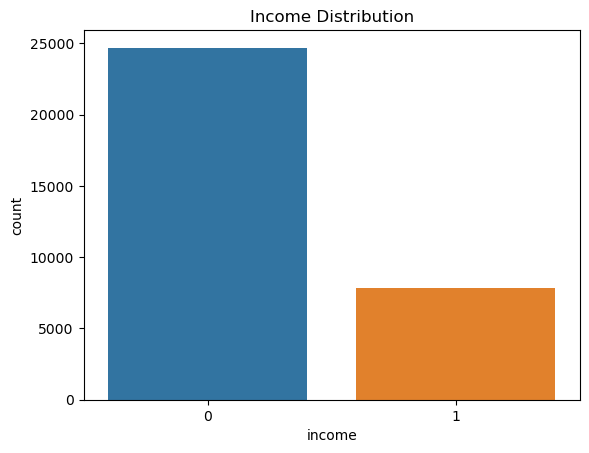

In [32]:
sns.countplot(x='income',data=df)
plt.title('Income Distribution')
plt.show()

## Age vs income

In [33]:
df.groupby('Age Group')['income'].sum()

Age Group
15-29     511
30-39    2308
40-49    2661
50-59    1707
60-69     539
70-79      97
80-89       8
90-99       8
Name: income, dtype: int64

Text(0.5, 1.0, 'Age Group VS Income')

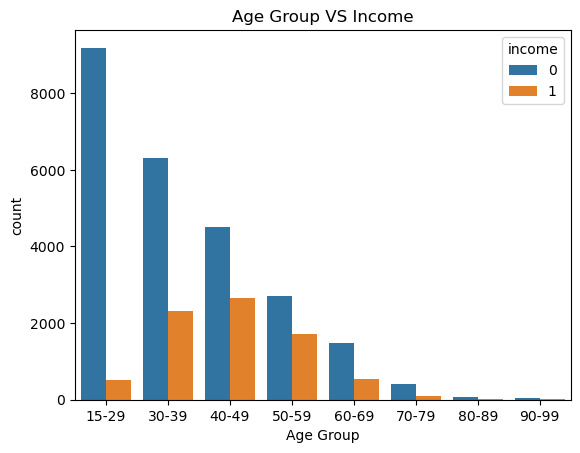

In [34]:
sns.countplot(x='Age Group', hue='income',data=df)
plt.title('Age Group VS Income')

**By looking at this graph we can conclude that the Age group 15-30 have the highest number of people whose earnings are less than 50k dollars per year
The Age groups 40-49 and 50-59 have the highest number of people whose earnings are more than $50k per year.**

In [35]:
df.groupby('workclass')['Age Group'].count()

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             24509
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
Name: Age Group, dtype: int64

Text(0.5, 1.0, 'Age Group VS workclass')

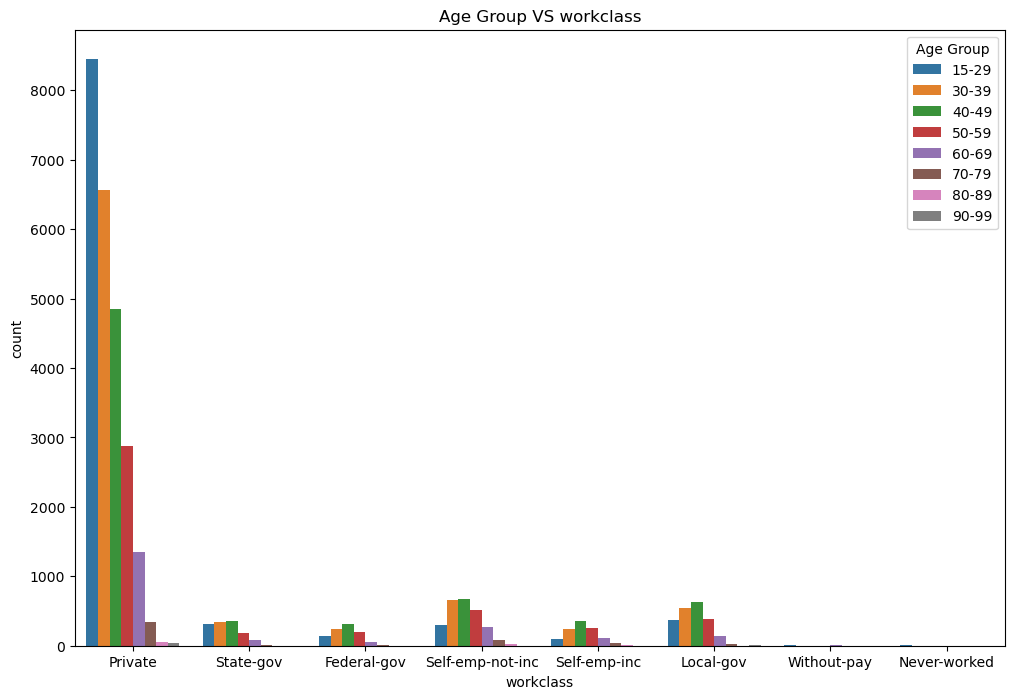

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='workclass', hue='Age Group',data=df)
plt.title('Age Group VS workclass')

 **We can see that most of people's work class is Private in all Age groups and then self-employment and local government.**

In [37]:

df.groupby('workclass')['income'].sum()

workclass
Federal-gov          371
Local-gov            617
Never-worked           0
Private             5152
Self-emp-inc         622
Self-emp-not-inc     724
State-gov            353
Without-pay            0
Name: income, dtype: int64

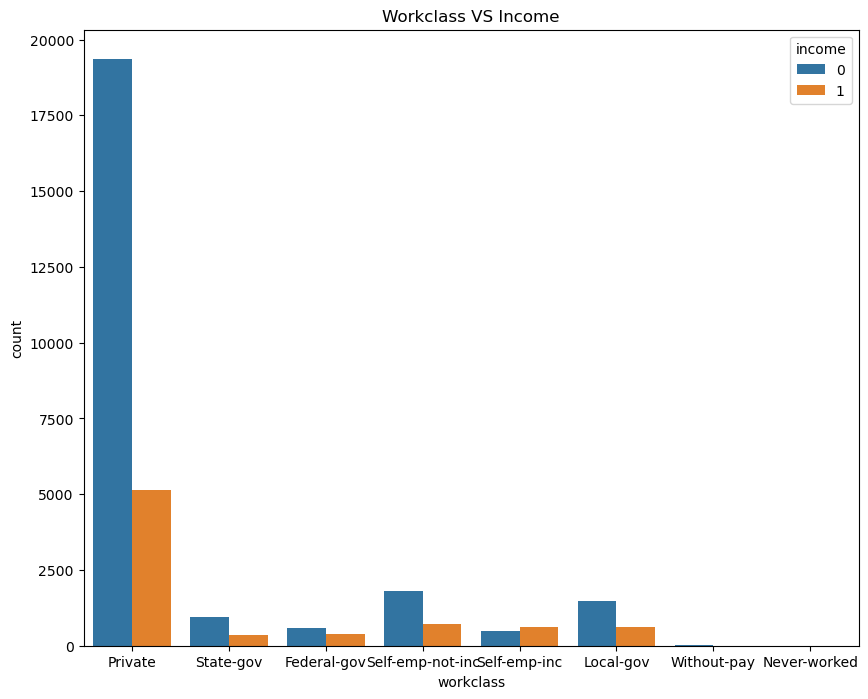

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='workclass',hue='income',data=df)
plt.title('Workclass VS Income')
plt.show()

**By looking at this graph we can conclude that only in self-emp-incorporated work class people earn more than 50k dollars as compared to people whose earnings are less than 50k dollars per year.**  

In [39]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,90-99
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,80-89
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,60-69


In [40]:
df.fnlwgt.shape

(32537,)

In [41]:
# We have an Age group column so there is no use of fnlwgt columns so we drop it
df.drop(columns=['fnlwgt'],axis=1,inplace=True)

In [42]:
df.head(3)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Group
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,90-99
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,80-89
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,60-69


In [43]:
df.groupby('education')['income'].sum()

education
10th              62
11th              60
12th              33
1st-4th            6
5th-6th           16
7th-8th           40
9th               27
Assoc-acdm       265
Assoc-voc        361
Bachelors       2221
Doctorate        306
HS-grad         1674
Masters          959
Preschool          0
Prof-school      423
Some-college    1386
Name: income, dtype: int64

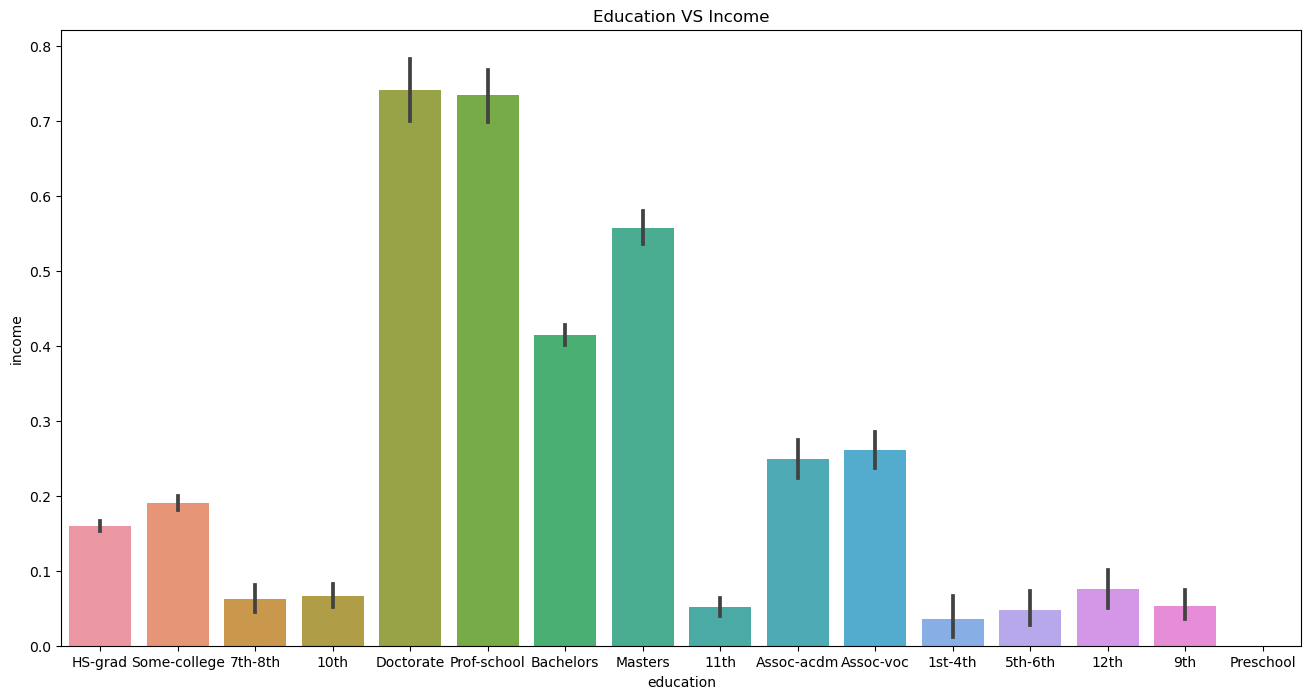

In [44]:
plt.figure(figsize=(16,8))
sns.barplot(x='education',y='income',data=df)
plt.title('Education VS Income')
plt.show()

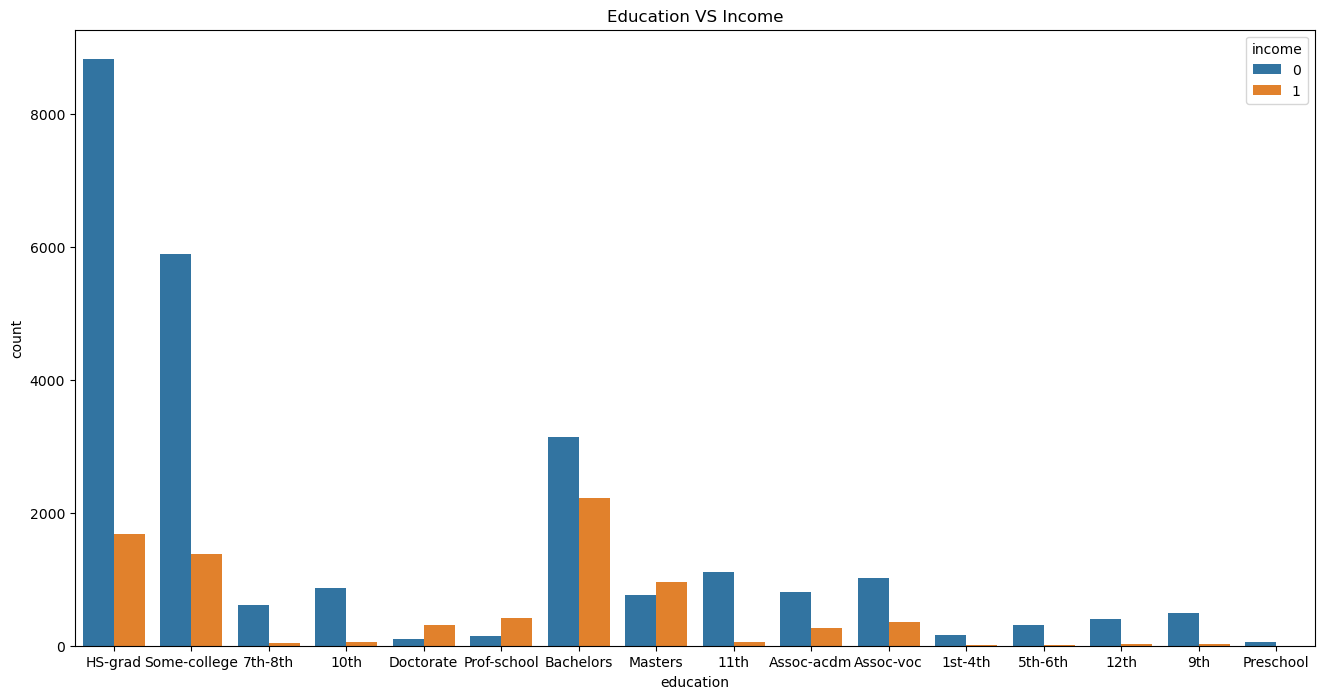

In [45]:
plt.figure(figsize=(16,8))
sns.countplot(x='education',hue='income',data=df)
plt.title('Education VS Income')
plt.show()

**We can see that only Doctorate, Prof-school and Masters have earned more than 50k dollars per year than those who have not earned more than 50k dollars.**
**In other education, more people earn less than 50k dollars than the people who earn greater than 50k dollars per year.**

In [46]:
df.groupby('marital.status')['income'].sum()

marital.status
Divorced                  463
Married-AF-spouse          10
Married-civ-spouse       6690
Married-spouse-absent      34
Never-married             491
Separated                  66
Widowed                    85
Name: income, dtype: int64

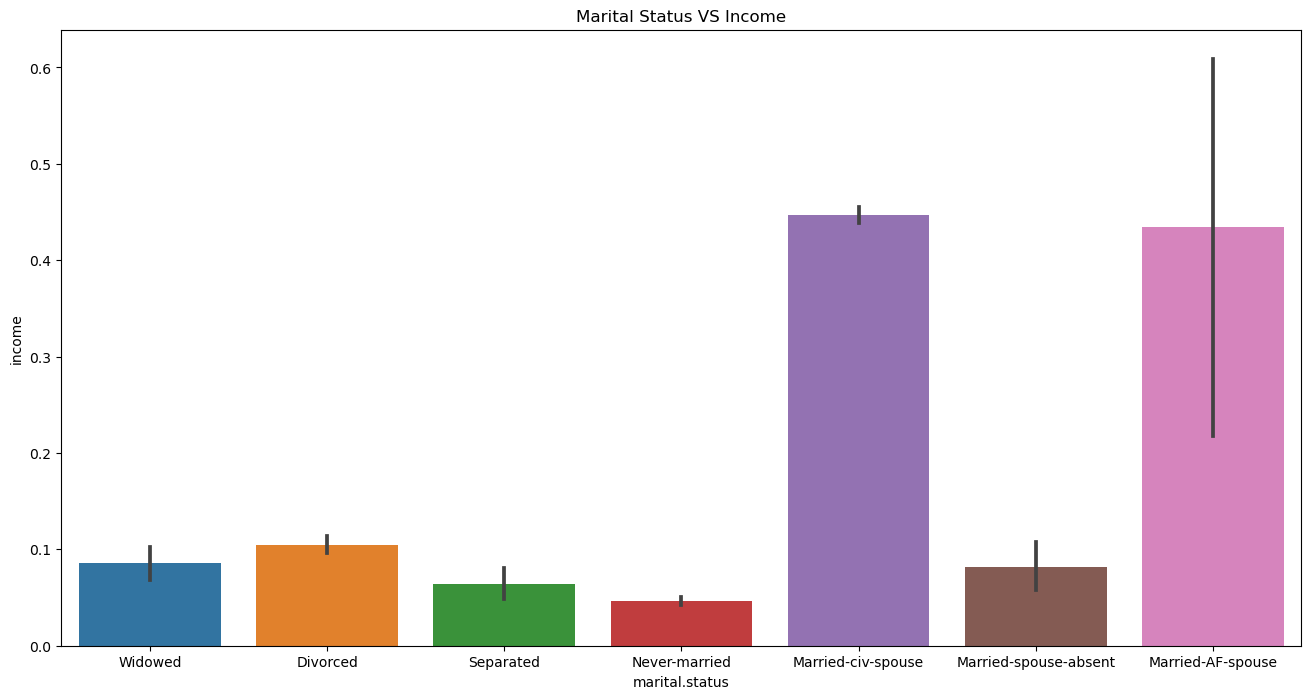

In [47]:
plt.figure(figsize=(16,8))
sns.barplot(x='marital.status',y='income',data=df)
plt.title('Marital Status VS Income')
plt.show()

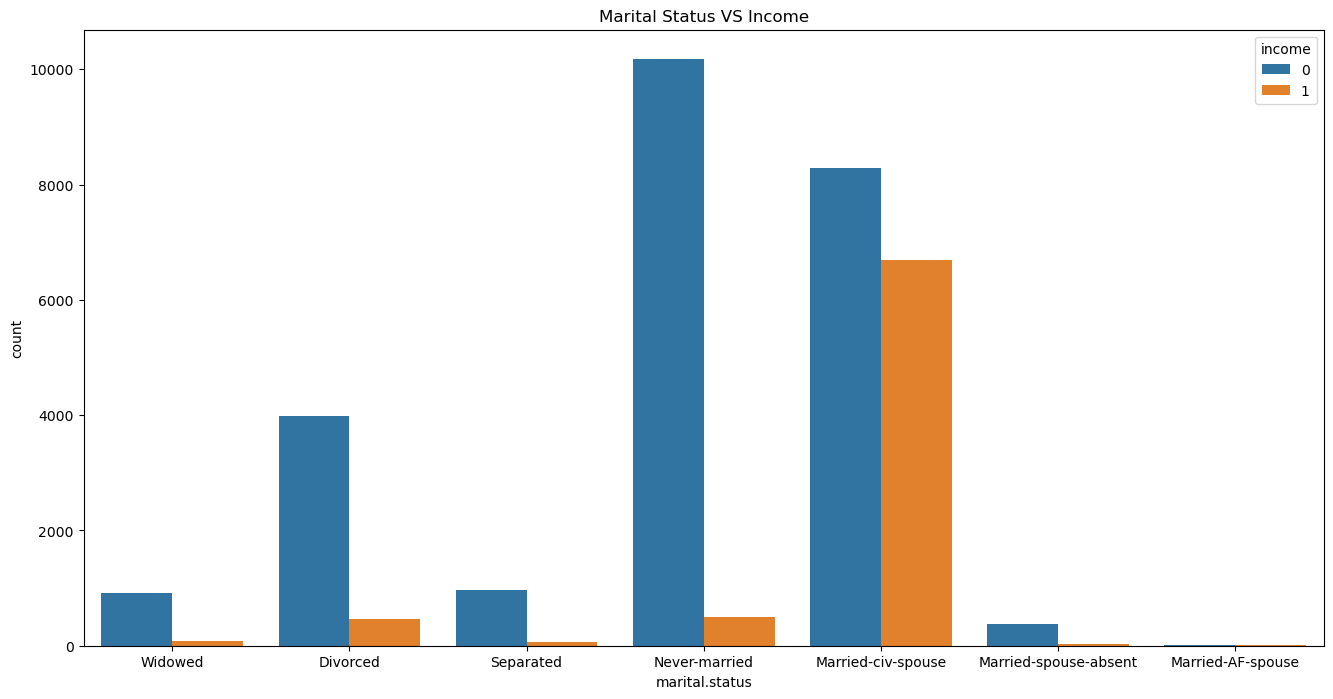

In [48]:
plt.figure(figsize=(16,8))
sns.countplot(x='marital.status',hue='income',data=df)
plt.title('Marital Status VS Income')
plt.show()

**In marital status, we can see that most people who Married Civilian Spouses earn more than 50k dollars per year as compared to other statuses and the least of people who never married. In never married most people earn less than 50k dollars.** 

In [49]:
df.groupby('occupation')['income'].sum()

occupation
Adm-clerical          507
Armed-Forces            1
Craft-repair          929
Exec-managerial      1968
Farming-fishing       115
Handlers-cleaners      86
Machine-op-inspct     249
Other-service         137
Priv-house-serv         1
Prof-specialty       2049
Protective-serv       211
Sales                 983
Tech-support          283
Transport-moving      320
Name: income, dtype: int64

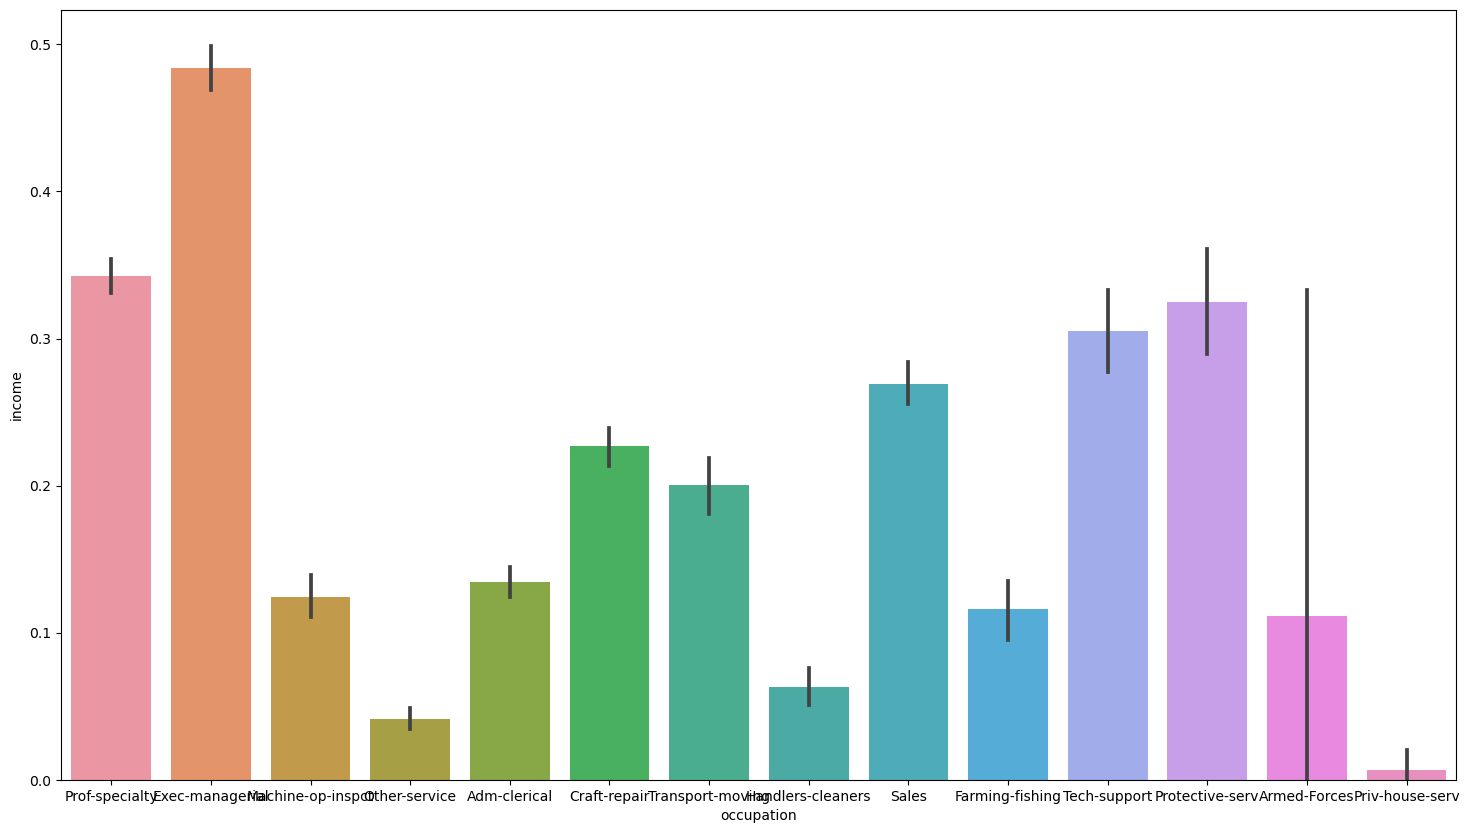

In [50]:
plt.figure(figsize=(18,10))
sns.barplot(x='occupation',y='income',data=df)
plt.show()

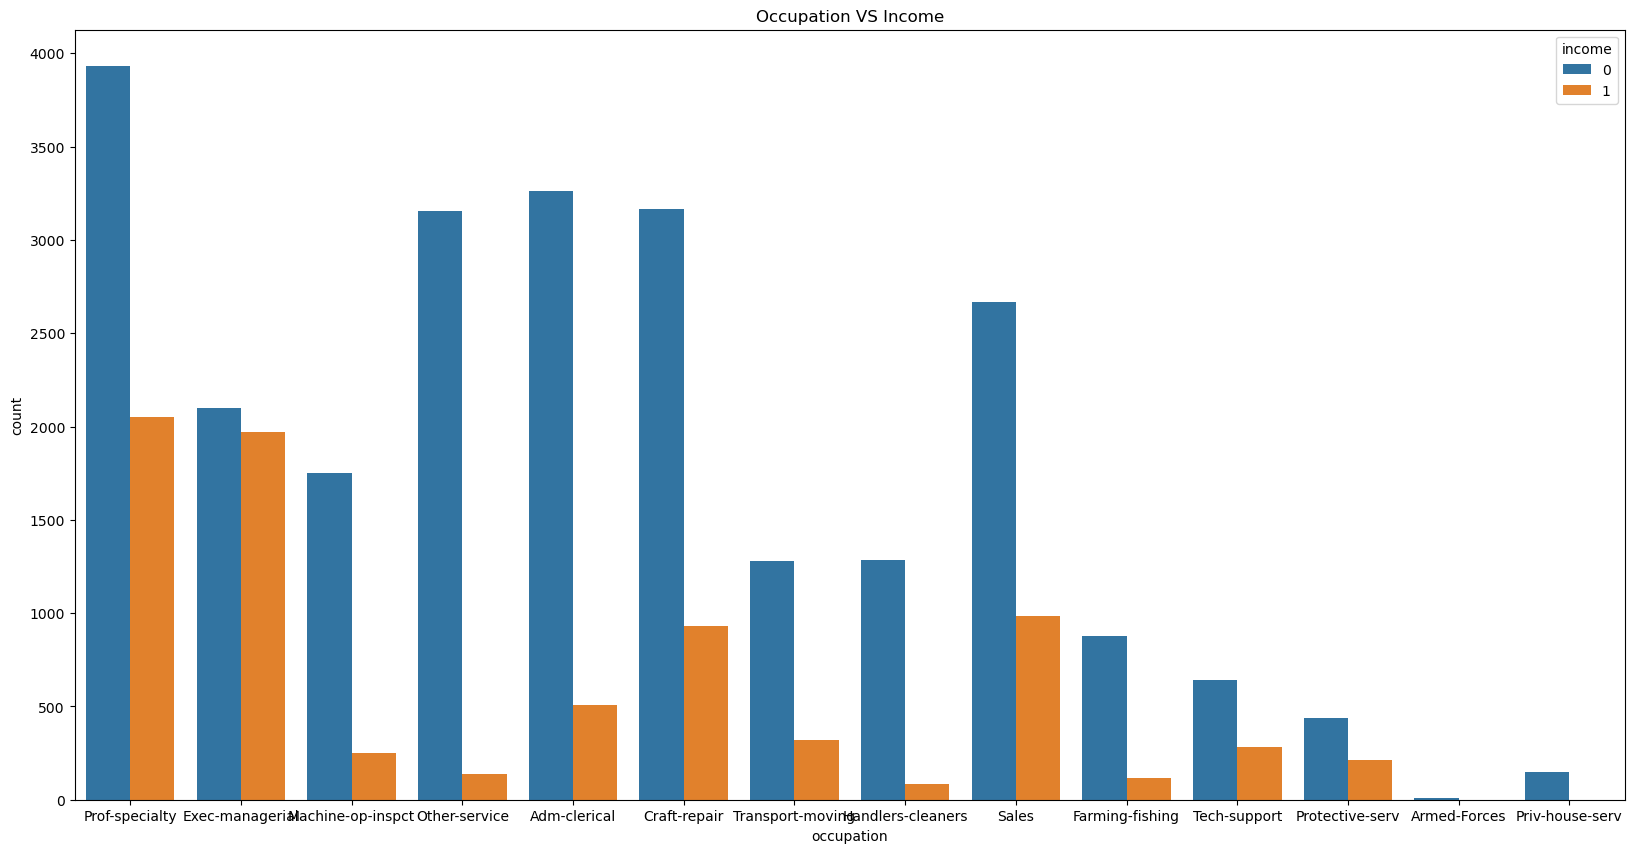

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Occupation VS Income')
plt.show()

**we can see as compared to other occupations Executive and Managerial Occupations have more number of people who earn more than 50k dollars per year and very few in the Armed forces.**

In [52]:
df.head(3)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Group
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,90-99
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,80-89
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,60-69


In [53]:
country_pls_hours =df.groupby('native.country')['hours.per.week'].sum().reset_index().sort_values('hours.per.week',ascending=False).head(10)

Text(0.5, 1.0, 'Country VS Hours per Week')

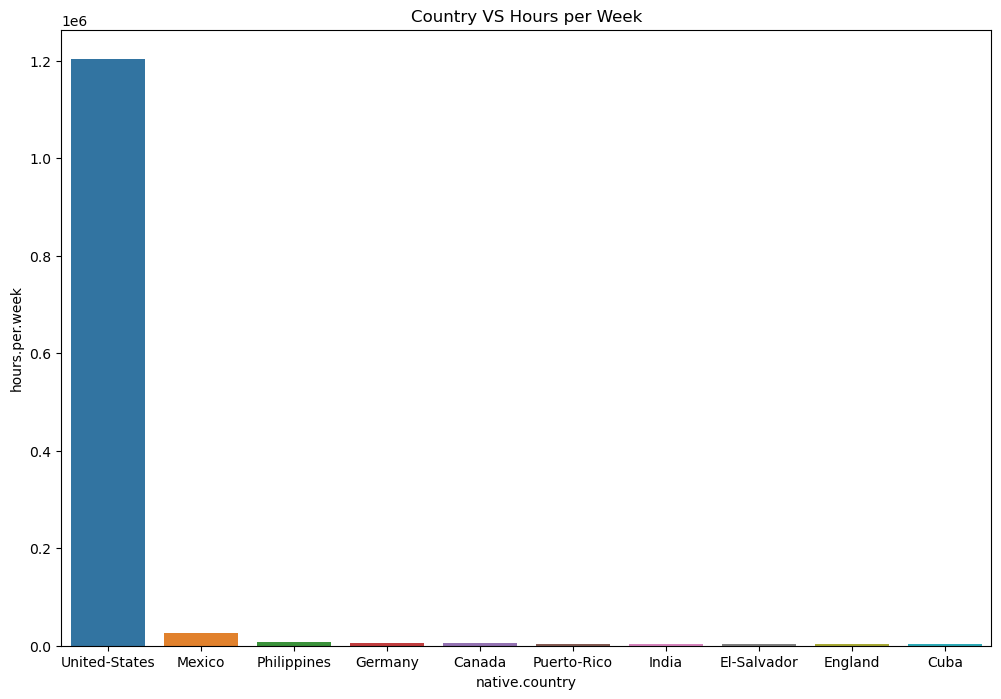

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x='native.country',y='hours.per.week',data=country_pls_hours)
plt.title('Country VS Hours per Week')

<Axes: xlabel='hours.per.week', ylabel='Density'>

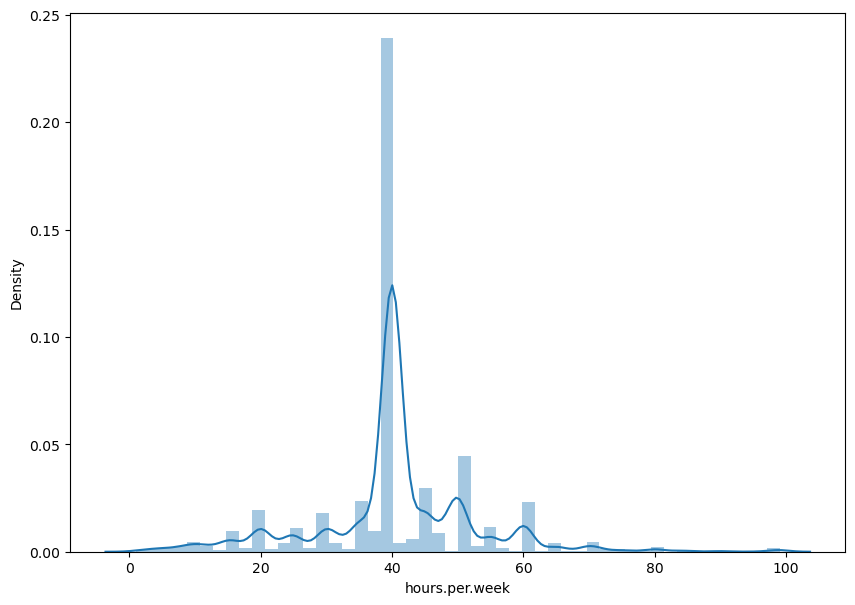

In [55]:
plt.figure(figsize=(10,7))
sns.distplot(df['hours.per.week'])

In [56]:
df.groupby('race')['income'].sum()

race
Amer-Indian-Eskimo      36
Asian-Pac-Islander     276
Black                  387
Other                   25
White                 7115
Name: income, dtype: int64

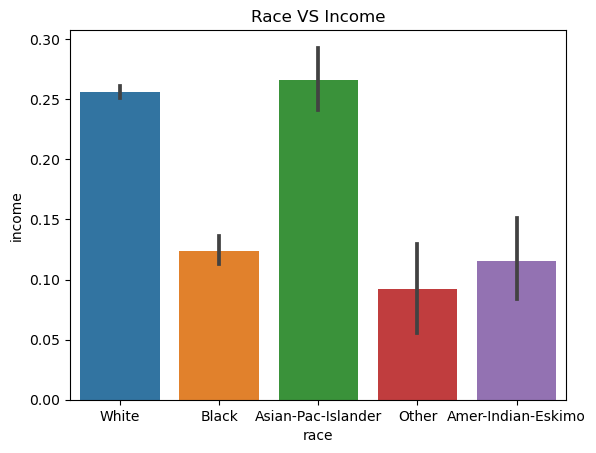

In [57]:
sns.barplot(x='race',y='income',data=df)
plt.title('Race VS Income')
plt.show()


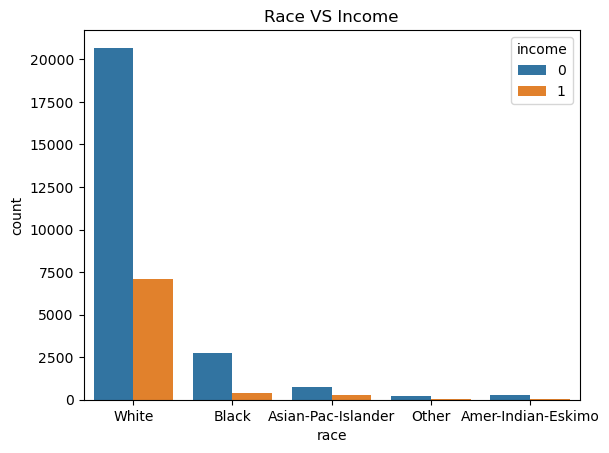

In [58]:
sns.countplot(x='race',hue='income',data=df)
plt.title('Race VS Income')
plt.show()

**The more number of people who earned more than greater than 50k dollars per year are white men as compared to other races.** 

In [59]:
df.groupby('sex')['income'].sum()

sex
Female    1179
Male      6660
Name: income, dtype: int64

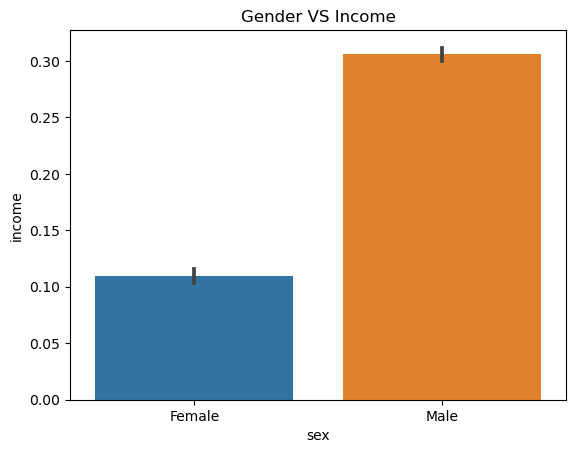

In [60]:
sns.barplot(x='sex',y='income',data=df)
plt.title('Gender VS Income')
plt.show()

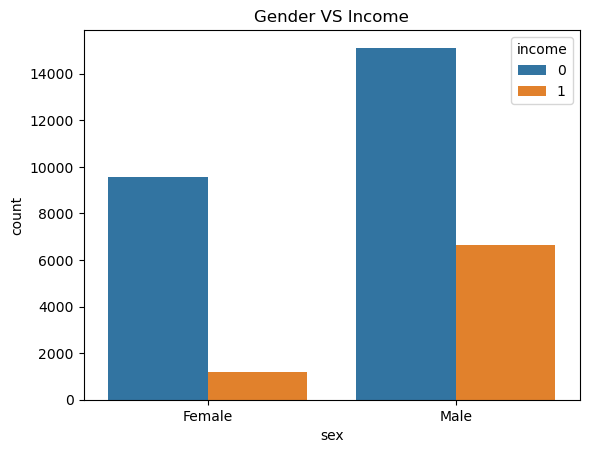

In [61]:
sns.countplot(x='sex',hue='income',data=df)
plt.title('Gender VS Income')
plt.show()

**We can see that Male candidates earned more than 50k dollars are more as compared to female candidates.**

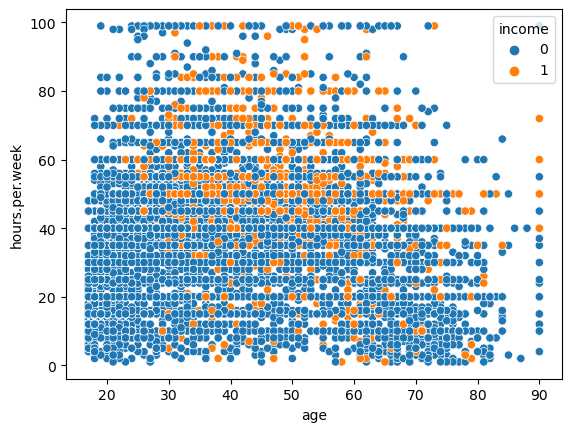

In [62]:
sns.scatterplot(x='age',y='hours.per.week',hue='income',data=df)
plt.show()

In [63]:
Top_10_country=df.groupby('native.country')['income'].sum().reset_index().sort_values('income',ascending=False).head(10)
Top_10_country

,native.country,income
38,United-States,7315
29,Philippines,61
10,Germany,44
18,India,40
1,Canada,39
25,Mexico,33
8,England,30
21,Italy,25
4,Cuba,25
23,Japan,24


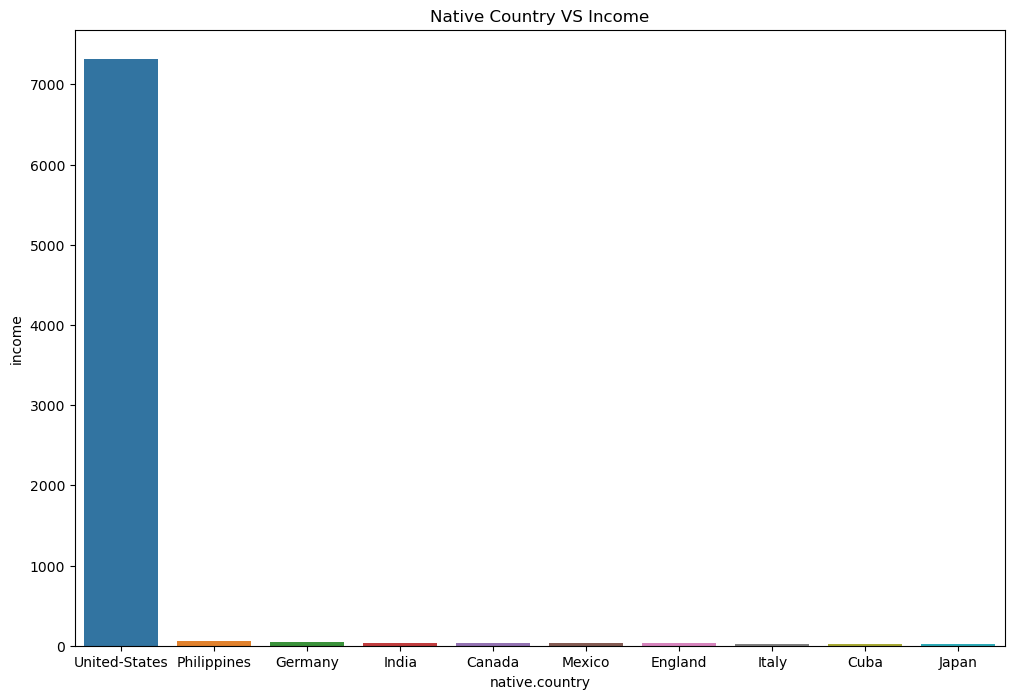

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x='native.country',y='income',data=Top_10_country)
plt.title('Native Country VS Income')
plt.show()

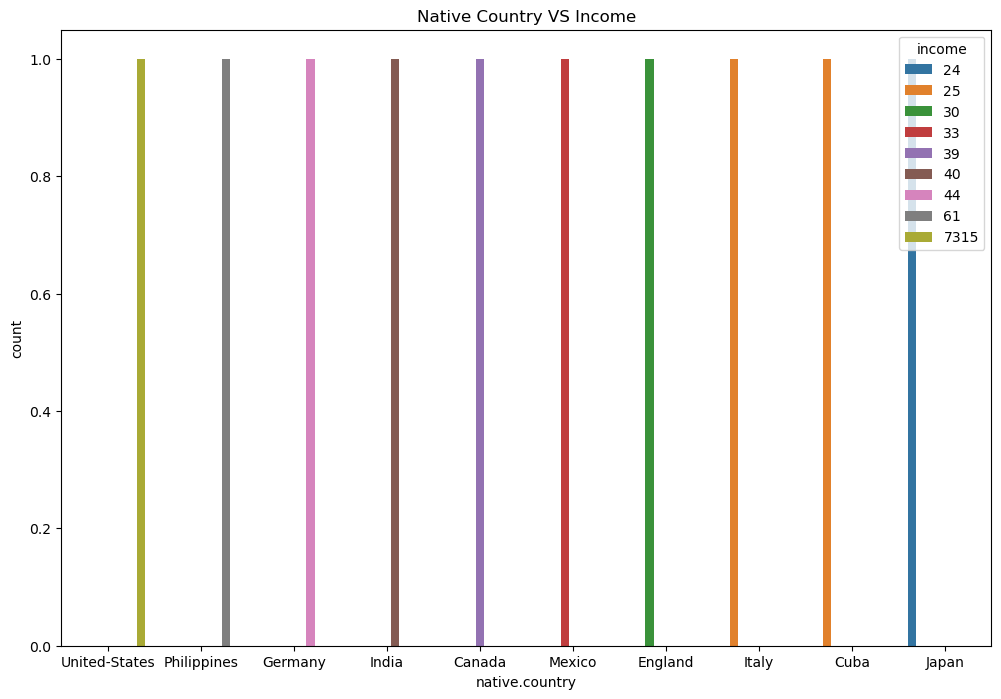

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(x='native.country',hue='income',data=Top_10_country)
plt.title('Native Country VS Income')
plt.show()

In [66]:
df['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

**We can see the most number of people are from United States and then the Philippines, Germany and India.**

In [67]:
# we have age column so drop the column Age Group
df.drop(columns=['Age Group','education'],axis=1,inplace=True)

In [68]:
cat_col =df.describe(include='object')
cat_col

,workclass,marital.status,occupation,relationship,race,sex,native.country
count,32537,32537,32537,32537,32537,32537,32537
unique,8,7,14,6,5,2,41
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24509,14970,5979,13187,27795,21775,29735


In [69]:
num_col =df.describe(exclude='object')
num_col

,age,education.num,capital.gain,capital.loss,hours.per.week,income
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Encoding the Categorical Columns

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in cat_col:
    l_encoder=LabelEncoder()
    df[column]=l_encoder.fit_transform(df[column])

### Here we split the data into train and test.


In [71]:
X =df.drop(['income'],axis=1)
y =df['income']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Scalling

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [74]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.043776,-0.082867,0.746709,-1.734420,-0.784777,1.600168,-1.958370,-1.425276,-0.145245,-0.217492,-0.039321,0.258665
1,-1.366824,-0.082867,-0.809647,0.923371,-1.036843,0.975627,0.393243,0.701618,-0.145245,-0.217492,-0.039321,0.258665
2,-0.558294,-0.082867,-0.420558,-0.405525,-1.036843,-0.897995,0.393243,0.701618,-0.145245,-0.217492,-0.039321,0.258665
3,-1.146316,-0.082867,-0.031469,0.923371,0.223490,1.600168,0.393243,-1.425276,-0.145245,-0.217492,-1.262746,0.258665
4,2.234807,1.724019,-0.420558,-0.405525,1.231756,-0.897995,0.393243,0.701618,-0.145245,-0.217492,0.613171,0.258665


## Model building

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [76]:
# Predicting for training and testing 
ytrain_pred = model1.predict(X_train)
ytrain_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [77]:
ytest_pred = model1.predict(X_test)
ytest_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
# Model Evaluation

train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.83, Testing Score 0.83


### Accuracy : Training Score = 83% and Testing Score = 83% 

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test,ytest_pred)

array([[6993,  417],
       [1290, 1062]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     17288
           1       0.72      0.46      0.56      5487

    accuracy                           0.83     22775
   macro avg       0.78      0.70      0.73     22775
weighted avg       0.82      0.83      0.81     22775



In [83]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7410
           1       0.72      0.45      0.55      2352

    accuracy                           0.83      9762
   macro avg       0.78      0.70      0.72      9762
weighted avg       0.81      0.83      0.81      9762

